# `Data Science Interview Questions` *4<sup>th</sup> Installment*

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)



# Q.1 ) `What are Eigenvalues & Eigenverctors?`

`------------------------------`

**`Answer`**:

+ Think of the `eigenvlaues` as scaling factors: denoted **$\lambda$**

+ `Eigenvectors` on the other hand are able to aid us in understanding a linear transfermation. When used in the context of data analysis we will see this in *correlation matrices* and *covariance matrices* such as Singular Value Decomposition. 
    + This will be a direction ( *since vector* ) and point in the direction which it is stretched. ( *if dealing with real positive* ) `eigenvectors`
    + The amount it is stretched is due to the `eigenvalue`
    
`--------------------------`

# Q.2 ) Explain what is `Box-Cox transformation`, and how it can be used for data normalization.

`------------------------------`

**`Answer`**:

**$T(Y) = \frac{(Y^\lambda -1)}{\lambda}$**

+ **Y**: response variable

+ **$\lambda$**: transformation variable, if $\lambda = 0$ the natural log is used instead for calculations. 

In general this transformation is used when you have non-normal dependent variables. You can use power transformations such as this when you have problems with stability of variance and *may help* you with your data by doing a transformation. 

+ good example and breakdown: https://sixsigmastudyguide.com/box-cox-transformation/


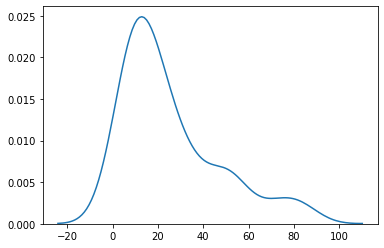

In [35]:
import seaborn as sns

skewed_array = [10,20,30,20,37,51,70,11,12,11,13,9,9,17,22,24,2,
           10,10,40,36,50,51,70,84,81,12,53,15,7,4,11,5,4,3,
           6,7,8,9,10,20,30,10,10,20,80,33,35,52,52,17,18,14,
           19,24,21,26,25,11,51]


sns.distplot(skewed_array, hist=False)

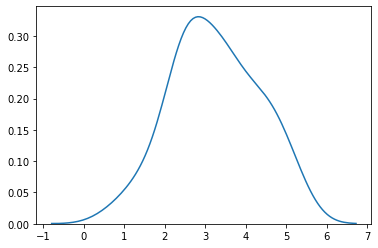

In [37]:
from scipy import stats

dft = stats.boxcox(skewed_array)[0]
sns.distplot(dft, hist=False)

+ In the end, you are trying to normalize your data and make improvements for modeling.

`----------------------------------------`

# Q.3 ) What is A/B Testing trying to achieve and give an example?

`-------------------------`

**`Answer`**:

+ Think of hypothesis testing, where you have two variants A and B and determine which is most effective. Essentially, you have  a single variable that is compared to the 2 versions/variants. 

An example of this is when you go to a website and it gauges user engagement such as good old `youtube` our friend and confidant.


**ex. )** you have a coupon that you send out: one coupon say expiring soon while the other has a specified date. You will then see how that will affect user engagement of sales. 

**ex. )** I look at my youtube analytics and see that I have gender but notice that it is not split 50/50 but instead 15.4% female the rest male. I will need to find a way to market to this audience differently if I want more female viewers.
+ How can we manage to handle these data? 
    + We can divide into age ranges, segment or target different aspects of our audience to get an idea of what we are dealing with in our audience and market to that. 

**ex. )** I have my youtube channel and create a thumbnail, and maybe it works maybe not. But, why not instead see how maybe 1 or 2 other thnumbnails works for the same video.

consider reading: https://en.wikipedia.org/wiki/A/B_testing | 
https://www.facebook.com/business/help/1962159924052051?id=445653312788501


`------------------------------------`

# Q.4 ) What are `Kernel` tricks/method?

`---------------------------`

**`Answer`**:

+ A method of using a linear classifier to transform non-linear data.
    + It acts like a modified dot product.
        + A function can take vactors as input from the original space and returns the dot product to a new feature space which is now your *kernel function*. 
        
       $k(x,z)=\langle\phi(x),\phi(y)\rangle$,
        
        Where x,z  $\epsilon X$ and map $\phi: x \to \mathbb{R}^N$ 
        
+ great for finding patterns

+ **Why would we want to use this anyway?**
    + If you have high dimensional data, well this can be very computationally expensive. `You are able to use a kernel trick to work with original data in that space, without needing to actually compute it in the new higher dimensional space.`
    
+ The outcome is less expensive, and more efficient!

<font color=red>Considerations</font>: you cannot look at using this blindly because, there are drawbacks and you have to think about:

+ Choosing the correct kernel function with parameters and regularization are VERY important to avoid overfitting. Since, you are mapping to a different dimension.


**ex.)** Assume your data are in 3-dimensional space, and you need to find a decision surface to clearly divide these data. But, they are non-linear.

well, assume these data look like this:

$x = (x_1,x_2,x_3)^T$

$y = (y_1,y_2,y_3)^T$

`But, if we map these data it will go from 3D to 9D`:

$\phi(x)=(x_1^2,x_1x_2,x_1x_3,x_2x_1,x_2^2,x_2x_3,x_3x_1,x_3x_2,x_3^2)$

$\phi(y)=(y_1^2,y_1y_2,y_1y_3,y_2y_1,y_2^2,y_2y_3,y_3y_1,y_3y_2,y_3^2)$


**`Doing this step we ended up with a scalar but, the tradeoff is`** *$O(n)^2$* time 
complexity

$\phi (x)^T \phi(y) =\sum_{i,j=1}^{3}x_ix_jy_iy_j$


`--------------------------`

Now, our little `kernel trick` to the rescue:

$k(x,y) = (x^Ty)^2=$

$(x_1y_1 + x_2y_2 + x_3y_3)^2 =$

$\sum_{i,j=1}^{3}x_ix_jy_iy_j$

Therefore we get the same end result with $O(n)$ time complexity now


`------------------------------`

# Q 5. ) What is `Ensemble learning` and when would you use it?

`------------------------`

**`Answer`**:

+ You are able to use multiple learners to solve the same problem, this is a technique used in machine learning. This can be done with several `trees` which will take what are called weak learners and combine them to form stronger learners and therefore increasing accuracy.
+ We use ensemble methods to reduce: bias and variance in order to increase our accuracy of the predicted variable. 

`Why use them anyway?`: consider if you have a model that you trained and end up with a lower than expected accuracy and high variance. This can be a situation that you would using ensemble learning. 
+ Think of using the ensemble learning not as one specific model that we train our data and hope that everything works out. You don't neccessarily want to have all your eggs in one basket now do you? If you had instead, multiple models training your data and then averaging together to generate a final model. Also, don't be fooled into thinking that `decision trees` are your only option for ensemble methods either. 

*3 examples of ensemble methods*: `bagging, boosting and stacking`

`Bagging`:

Take a random set of samples drawn *N* times using replacement and create nonpruned tree. Why use [*with replacement*] anyway? Because, you want an equal likelyhood of each decision tree to occur for branching, essentially creating optimal "coverage". This will be repeated *N* times and finally, a vote will be taken to decide what to keep based on accuracy. 
*Note*: overfitting is avoided due to the central limit theorem.
*Also*, you are not guaranteed the best accuracy either but instead you are able to improve the rank bias of your model which will help your classification. 


`Boosting`:

Here, the weighting of your samples will change over time. Initially you start with equal weights and changed after each iteration. If there is a correctly assigned are given lower weighted otherwise they will be penalized. Afterward, the weights will be normalized for the samples. 


`Stacking`:

It is usually, "more commonly" used in combining multiple model types: where you apply several base learners and do a few steps like this:

**1. )** take the original dataset, train
    * you can take at this point different techniques (*boosting, bagging, etc*)
**2. )** create a new dataset from what you learned in step 1
    * The output from the first classifiers will now be used as your features. You can take the probability values instead of the labels and at this point use different activation functions to create your features. 
**3. )** learn from the second step and create a new classifer
    * use any learning method here, for your second classifier. Think of this as a plug and play.

`good further reading`: https://machinelearningmastery.com/ensemble-methods-for-deep-learning-neural-networks/  **or**  https://www.sciencedirect.com/topics/computer-science/ensemble-learning


`--------------------------------`

# Q 6. ) How can weights be initialized in a neural network?

**`Answer`**:

There are two ways: set them to zero or randomly assign them

`Setting to zero initially`: 

this will essentially, do nothing for a network and act as a linear model since nothing is changing in each layer. Therefore, nothing is gained in each layer and your no better off than using a linear model no matter the number of iterations. 
+ `A side note`: the bias will also have no effect with a weight of zero as well.


`Randomly assign`:

Randomly assigned values are better than zero, but is there a range of values to use or stay away from? It turns out this can be a problem if you are not careful and run into a situation called `vanishing gradient`. 

Consider, if you are using an activation function `sigmoid`:
higher values will map close to 1, and give a slope that will allow you to learn more over time. But, if you were to use small values they would approach zero. 


`Extra Info`:

Techniques: that have help quite a bit in this field such as 

`Relu`: which can aid in avoiding issues with the gradient and the time it may take to solve a problem. 
 

`-----------------------------`

# Q 7. ) What are the difference between Extrapolation vs Interpolation?

`Answer`

**`Extrapolation`**: you are extend your current data to do an approximation. 

Think of an example using time series data from the stock market and you are using existing data to make a prediction for the future price.


**`Interpolation`**: you are using 2 values from a list of values to make an estimate


`----------------------`

# <font color=red>LIKE</font>, Share &

# <font color=red>SUB</font>scribe

`-----------------------`


# Citations & Help

# ◔̯◔


`Box-Cox`

http://www.kmdatascience.com/2017/07/box-cox-transformations-in-python.html

https://blog.minitab.com/blog/applying-statistics-in-quality-projects/how-could-you-benefit-from-a-box-cox-transformation

https://www.itl.nist.gov/div898/handbook/eda/section3/eda336.htm

`Kernel`

https://towardsdatascience.com/kernel-function-6f1d2be6091#:~:text=In%20machine%20learning%2C%20a%20%E2%80%9Ckernel,solve%20a%20non%2Dlinear%20problem.&text=The%20kernel%20function%20is%20what,in%20which%20they%20become%20separable.


https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f#:~:text=The%20%E2%80%9Ctrick%E2%80%9D%20is%20that%20kernel,the%20data%20by%20these%20transformed

https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d


`Ensemble Learning`

https://www.datacamp.com/community/tutorials/ensemble-learning-python

https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/springerEBR09.pdf

https://medium.com/ml-research-lab/ensemble-learning-the-heart-of-machine-learning-b4f59a5f9777

https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f

https://web.njit.edu/~avp38/projects/multi_projects/ensemble.html

`Weights Initialization for network`

https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78

